In [1]:
# import libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression

# import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay

import matplotlib.pyplot as plt

Import the data on Cardiovascular Disease. Please see the description of the variables.

https://sleepdata.org/datasets/shhs/variables


In [2]:
# import the data
cvd_df = pd.read_csv('https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv')

## Exploratory Data Analysis

In [3]:
# show first 5 rows of the dataset
cvd_df.head(5)

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


In [4]:
cvd_df.tail(5)

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
3237,1,66,1,2,1,95.0,41.5,99.0,88.2,0.0,0,1,0,2,2,5,4
3238,1,54,1,3,1,99.0,34.9,99.0,83.3,30.0,0,0,0,3,3,3,4
3239,1,55,1,4,1,101.0,37.0,91.0,75.2,0.0,0,0,0,3,2,5,4
3240,1,53,1,2,1,98.0,39.0,93.0,79.0,0.0,0,0,0,2,2,5,4
3241,1,54,1,2,1,109.0,48.6,112.0,93.5,39.0,0,1,0,3,2,5,4


In [5]:
# show the number of records
cvd_df.shape

(3242, 17)

In [6]:
# check if the dataset is balanced, overall distribution
cvd_df.describe()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
count,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000
mean,0.590068,64.828809,1.094695,2.326342,1.368600,105.404832,37.550719,97.209904,82.945928,12.904010,0.430907,0.327884,0.067551,2.473782,2.281308,4.292721,3.864898
std,0.491897,10.400496,0.358237,0.697934,0.933871,10.280402,4.101003,13.598060,7.849650,20.156736,1.242444,0.469515,0.251012,0.672158,0.951695,1.021099,0.614247
min,0.000000,39.000000,1.000000,1.000000,1.000000,44.000000,25.000000,67.000000,57.400000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,57.000000,1.000000,2.000000,1.000000,99.000000,34.425000,88.000000,78.200000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,4.000000
50%,1.000000,65.000000,1.000000,2.000000,1.000000,104.000000,37.150000,97.000000,82.550000,0.300000,0.000000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
75%,1.000000,73.000000,1.000000,3.000000,1.000000,110.000000,40.500000,106.000000,86.575000,20.475000,0.000000,1.000000,0.000000,3.000000,3.000000,5.000000,4.000000
max,1.000000,90.000000,3.000000,4.000000,8.000000,168.000000,53.000000,135.000000,136.700000,170.500000,30.000000,1.000000,1.000000,3.000000,6.000000,6.000000,5.000000


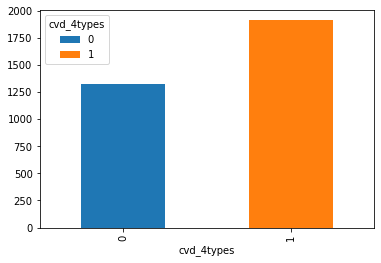

In [7]:
# Creating barplot to see the balance of the dependent variable
pd.crosstab(cvd_df['cvd_4types'],cvd_df['cvd_4types']).plot(kind='bar',stacked=True)

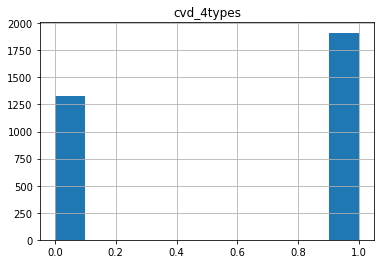

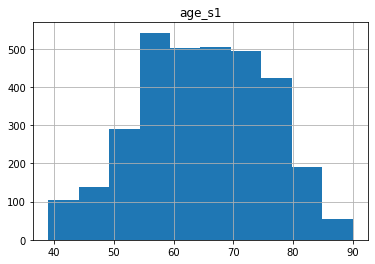

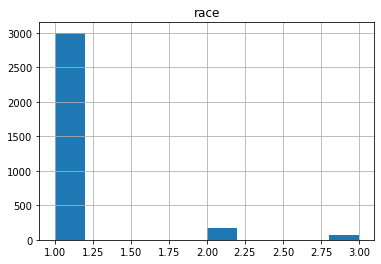

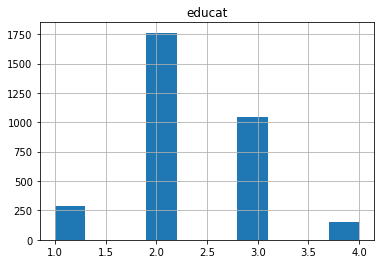

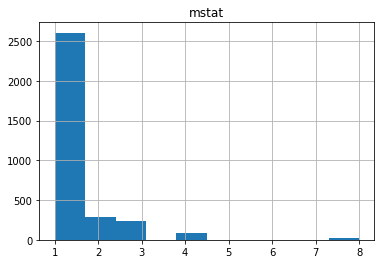

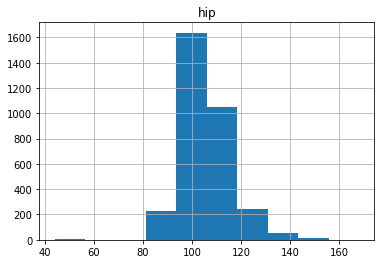

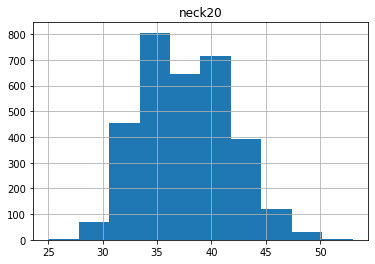

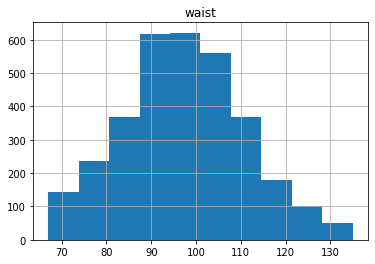

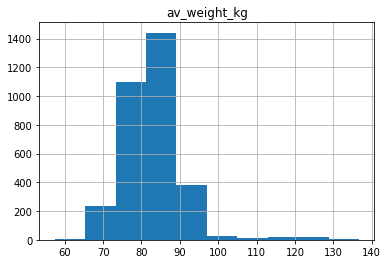

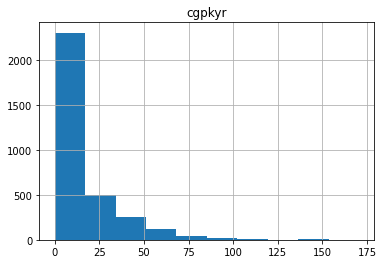

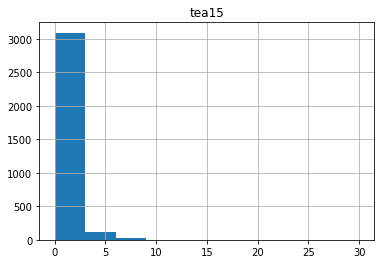

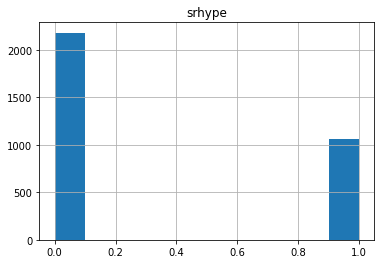

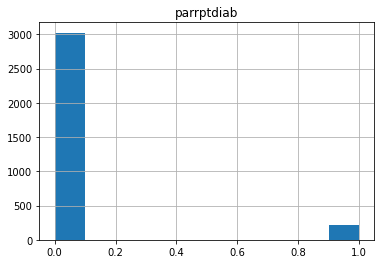

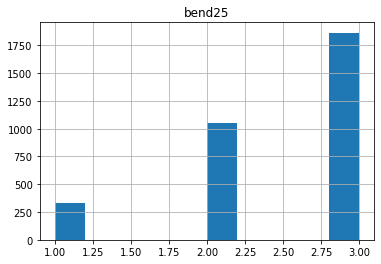

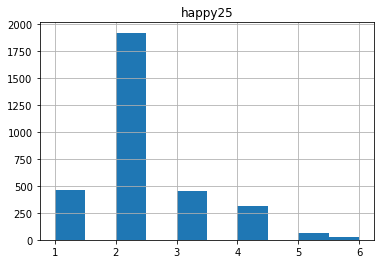

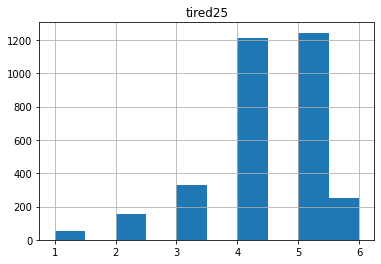

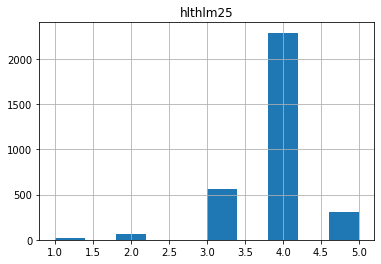

In [8]:
# Distribution of variables
for variable in cvd_df.columns:
  plt.figure()
  plt.title(variable)
  cvd_df[variable].hist()

Not all variables are normally distributed, there might be a need for normalisation or transformation.

In [9]:
# check for missing values
print('Number of missing values: ', cvd_df.isnull().sum().sum())
print()
cvd_df.info()

Number of missing values:  0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cvd_4types    3242 non-null   int64  
 1   age_s1        3242 non-null   int64  
 2   race          3242 non-null   int64  
 3   educat        3242 non-null   int64  
 4   mstat         3242 non-null   int64  
 5   hip           3242 non-null   float64
 6   neck20        3242 non-null   float64
 7   waist         3242 non-null   float64
 8   av_weight_kg  3242 non-null   float64
 9   cgpkyr        3242 non-null   float64
 10  tea15         3242 non-null   int64  
 11  srhype        3242 non-null   int64  
 12  parrptdiab    3242 non-null   int64  
 13  bend25        3242 non-null   int64  
 14  happy25       3242 non-null   int64  
 15  tired25       3242 non-null   int64  
 16  hlthlm25      3242 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 43

# Part 1. Build a binary CLassifier

In [10]:
# Part 1 Build a binary classifier

In [11]:
# define the independent and dependent variables
X = cvd_df.drop('cvd_4types', axis= 1)
y = cvd_df['cvd_4types']

In [12]:
# Independent variables
X.head(2)

,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3


In [13]:
# dependent variable
y.head(2)

0    0
1    0
Name: cvd_4types, dtype: int64

In [14]:
# split into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12, stratify=y)

              precision    recall  f1-score   support

           0       0.64      0.49      0.55       332
           1       0.70      0.81      0.75       479

    accuracy                           0.68       811
   macro avg       0.67      0.65      0.65       811
weighted avg       0.67      0.68      0.67       811



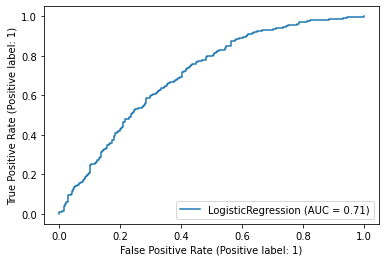

In [15]:
# build the classifier using logistic regression 1
clf = LogisticRegression(solver = 'newton-cg', random_state = 12)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# print scores for the model
print(classification_report(y_test, y_pred))

# plot the ROC curve
RocCurveDisplay.from_estimator(clf, X_test, y_test)

              precision    recall  f1-score   support

           0       0.64      0.49      0.55       332
           1       0.70      0.81      0.75       479

    accuracy                           0.68       811
   macro avg       0.67      0.65      0.65       811
weighted avg       0.67      0.68      0.67       811



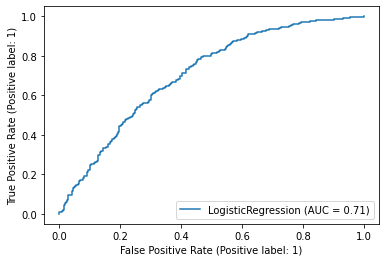

In [16]:
# build the classifier using logistic regression 2
clf2 = LogisticRegression(class_weight = 'balanced', solver = 'newton-cg', random_state = 12)
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)

# print scores for the model
print(classification_report(y_test, y_pred))

# plot the ROC curve
RocCurveDisplay.from_estimator(clf2, X_test, y_test)

              precision    recall  f1-score   support

           0       0.55      0.64      0.59       332
           1       0.72      0.65      0.68       479

    accuracy                           0.64       811
   macro avg       0.64      0.64      0.64       811
weighted avg       0.65      0.64      0.65       811



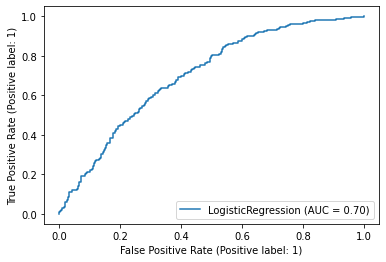

In [17]:
# build the classifier using logistic regression 3
clf = LogisticRegression(class_weight = 'balanced', solver = 'liblinear', random_state = 12)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# print scores for the model
print(classification_report(y_test, y_pred))

# plot the ROC curve
RocCurveDisplay.from_estimator(clf, X_test, y_test)

The second classifier (clf2) is the best of 3

# Part 2. Display the Feature Importance

In [19]:
from matplotlib import pyplot
# get importance
importance = clf2.coef_[0]

In [20]:
# show the most important features 
importance_df = pd.DataFrame({'variables': X.columns, 'importance':abs(importance)})
importance_df.sort_values(by=['importance'], ascending = False, inplace =  True)
importance_df

,variables,importance
1,race,0.965444
11,parrptdiab,0.729381
15,hlthlm25,0.571166
2,educat,0.325722
14,tired25,0.160124
12,bend25,0.153652
3,mstat,0.146664
10,srhype,0.127600
6,waist,0.082564
13,happy25,0.073577


<BarContainer object of 16 artists>

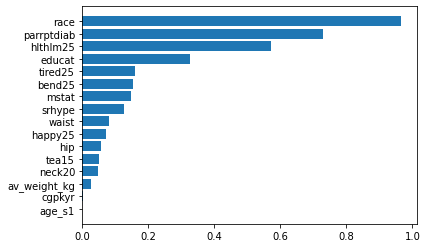

In [21]:
# create a barplot of importance by variable
importance_df.sort_values(by=['importance'], ascending = True, inplace =  True)
pyplot.barh(importance_df.variables, importance_df.importance)

# Part 3. Evaluate the performance of the model

              precision    recall  f1-score   support

           0       0.56      0.65      0.60       332
           1       0.73      0.65      0.68       479

    accuracy                           0.65       811
   macro avg       0.64      0.65      0.64       811
weighted avg       0.66      0.65      0.65       811



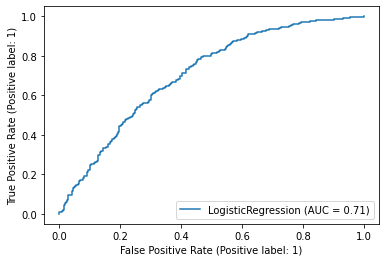

In [22]:
# print scores for the model
print(classification_report(y_test, y_pred2))

# plot the ROC curve
RocCurveDisplay.from_estimator(clf2, X_test, y_test)

# Conclusion

Overall the model didn't perform well. All performance metrics are low. 
I tried changing the hyperparameters but it didn't lead to significant improvements.

But it's worth mentioning that the poor performance of the model might come from the limitations of the data. The data is imbalanced, the dataset is small and some of the variables probably can't be trusted because of their distribution.

Also regardless of the model used, predicting Cardiovascular Disease without any Blood Test information with high accuracy might be very hard and might require more data and more variables.